# Exploratory data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 8)})

Для начала просмотрим общую информацию о датасете.

In [4]:
df = pd.read_csv('../train_music.csv')
df = df.sample(20000, random_state=42)
df.info(max_cols=462)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 46730 to 59369
Data columns (total 461 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    id                                   20000 non-null  int64  
 1    target                               20000 non-null  int64  
 2    device_type                          20000 non-null  int64  
 3    manufacturer_category                20000 non-null  int64  
 4    os_category                          20000 non-null  int64  
 5    sim_count                            19799 non-null  float64
 6    tp_flag                              20000 non-null  int64  
 7    lt                                   20000 non-null  float64
 8    block_flag                           20000 non-null  int64  
 9    days_exp                             19997 non-null  float64
 10   service_1_flag                       19997 non-null  float64
 11   service_1

Посмотрим, сколько значений отсутствует в датасете для каждой колонки.

In [3]:
columns = list(df.columns)
nulls = []

for col in columns:
    nulls.append([df[col].isna().sum(), col])
nulls.sort(reverse=True)

In [4]:
print('Maximum null value counts:')
for val, col in nulls[:50]:
    print(col, ': ', val, sep='')

Maximum null value counts:
count_url_category_13: 19853
count_url_category_15: 19760
vol_app_3: 19719
count_app_3: 19719
count_url_category_12: 19644
vol_app_11: 19546
count_app_11: 19546
count_url_category_1: 19450
rr_gift_type_4: 19425
count_gift_type_4: 19425
vol_app_13: 19423
count_app_13: 19423
vol_app_16: 19351
count_app_16: 19351
vol_app_14: 19292
count_app_14: 19292
service_9_flag_m3: 18967
count_url_category_11: 18965
service_9_flag_m2: 18911
service_9_flag_m1: 18910
count_url_category_6: 18701
count_url_category_8: 18652
count_url_category_3: 17997
count_url_category_4: 17831
vol_app_2: 17702
count_app_2: 17702
vol_app_8: 17691
count_app_8: 17691
data_type_1_m3: 17641
income_brnd_cont_m2: 17481
income_brnd_cont_m1: 17354
income_brnd_cont_m3: 17346
count_url_category_9: 17342
count_url_category_7: 17255
data_type_1_m2: 17184
vol_app_6: 16847
count_app_6: 16847
data_type_1_m1: 16450
vol_app_15: 16368
count_app_15: 16368
count_url_category_10: 16051
vol_app_9: 15951
count_app_9:

In [5]:
print('Minimum null value counts:')
for val, col in nulls[-50:]:
    print(col, ': ', val, sep='')

Minimum null value counts:
block_all_dur_m1: 110
sms_onnet_out_pack_count_m3: 3
sms_onnet_out_pack_count_m2: 3
sms_onnet_out_pack_count_m1: 3
sms_omo_out_pack_count_m3: 3
sms_omo_out_pack_count_m2: 3
sms_omo_out_pack_count_m1: 3
short_out_calls_part_m3: 3
short_out_calls_part_m2: 3
short_out_calls_part_m1: 3
short_in_calls_part_m3: 3
short_in_calls_part_m2: 3
short_in_calls_part_m1: 3
service_6_count_m3: 3
service_6_count_m2: 3
service_6_count_m1: 3
service_5_count_m3: 3
service_5_count_m2: 3
service_5_count_m1: 3
service_3_flag: 3
service_2_flag: 3
service_1_flag: 3
service_1_count: 3
paym_el_sum_m3: 3
paym_el_sum_m2: 3
paym_el_sum_m1: 3
paym_el_count_m3: 3
paym_el_count_m2: 3
paym_el_count_m1: 3
inact_days_count: 3
days_exp: 3
balance_sum: 3
act_days_count_m3: 3
act_days_count_m2: 3
act_days_count_m1: 3
abon_part_m3: 3
abon_part_m2: 3
abon_part_m1: 3
tp_flag: 0
target: 0
os_category: 0
manufacturer_category: 0
lt: 0
is_obl_center: 0
is_my_vf: 0
id: 0
device_type: 0
data_type_3_m1: 0


Посмотрим на распределение признаков, связанных с железом.

Так как данные признаки имеют тип Hash, то их можно считать категориальными признаками.

In [6]:
df['device_type'] = df['device_type'].map(str)
df['manufacturer_category'] = df['manufacturer_category'].map(int)
df['os_category'] = df['os_category'].map(str)

In [7]:
df['device_type'].value_counts()

7    16425
4     2813
8      420
1      201
6      105
5       27
3        9
Name: device_type, dtype: int64

In [8]:
df['manufacturer_category'].value_counts()

1057    5101
1756    2602
69      1924
745     1527
896     1510
        ... 
789        1
757        1
533        1
517        1
1671       1
Name: manufacturer_category, Length: 298, dtype: int64

In [9]:
df['os_category'].value_counts()

3     14588
27     1924
28     1546
1      1130
16      426
26      145
20       86
15       67
6        32
17       28
24       13
25        7
7         6
18        1
12        1
Name: os_category, dtype: int64

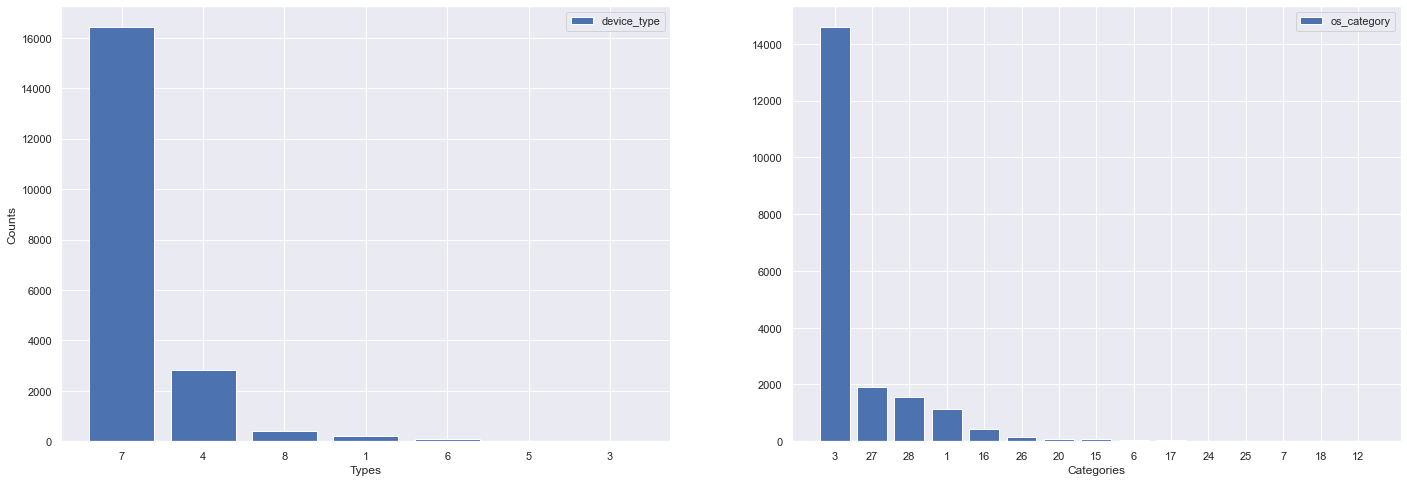

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(24, 8))

dt_value_counts = df['device_type'].value_counts()
dt_col_list = list(dt_value_counts.index)
dt_val_list = list(dt_value_counts.values)
ax0.bar(dt_col_list, dt_val_list, label='device_type')
ax0.set_xlabel('Types')
ax0.set_ylabel('Counts')
ax0.legend(loc=0)

oc_value_counts = df['os_category'].value_counts()
oc_col_list = list(oc_value_counts.index)
oc_val_list = list(oc_value_counts.values)
ax1.bar(oc_col_list, oc_val_list, label='os_category')
ax1.set_xlabel('Categories')
ax1.legend(loc=0)

plt.show()

Категорий производителей очень много (около 300), поэтому построим гистограмму.

<AxesSubplot:>

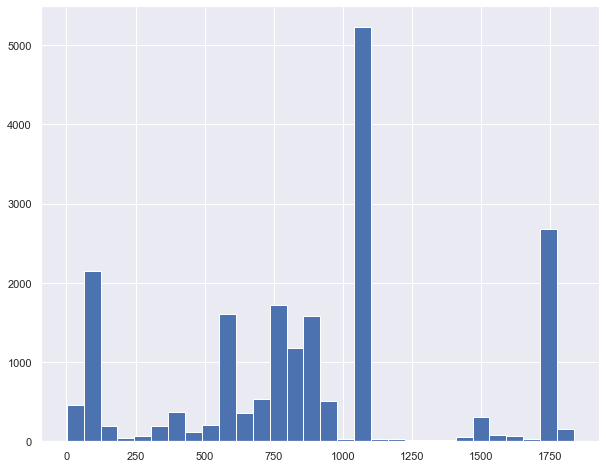

In [11]:
df['manufacturer_category'].hist(bins=30)

In [12]:
df['manufacturer_category'].value_counts().index[0]

1057

Как можно увидеть, в значениях данных признаков присутствуют как популярные (для типа устройства, категории операционной системы и производителя соответственно - 7, 3, 1057), так и редкие значения. Есть также значения, которые присутствуют в виде нескольких экземпляров.

Рассмотрим общее количвество времени жизни клиента.

Рассмотрим распределение таргета по тому, есть ли у клиента специальный тарифный план или нет.

<AxesSubplot:xlabel='tp_flag', ylabel='count'>

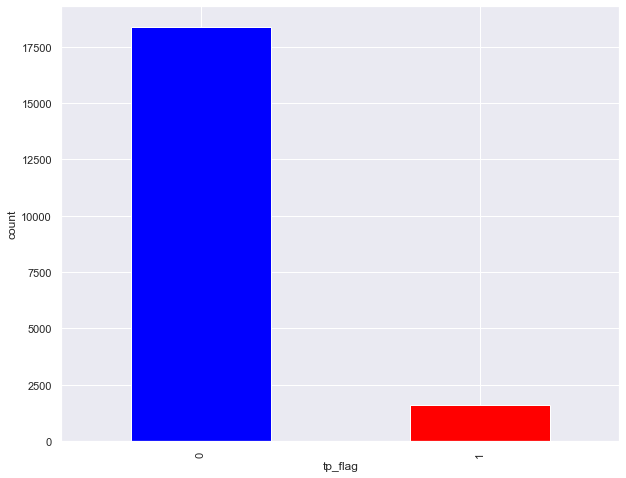

In [13]:
df['tp_flag'].value_counts().plot(kind='bar', xlabel='tp_flag', ylabel='count', color=['blue', 'red'])

<AxesSubplot:xlabel='count', ylabel='tp_flag'>

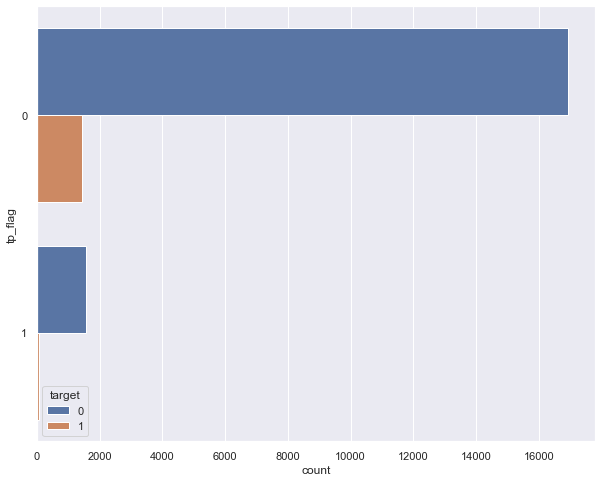

In [14]:
sns.countplot(y='tp_flag', hue='target', data=df)

Можно увидеть, что наличие тарифного плана особо не влияет на таргет.

Посмотрим, правда ли, что люди из обласных центром охотнее покупают тарифный план.

<AxesSubplot:xlabel='count', ylabel='is_obl_center'>

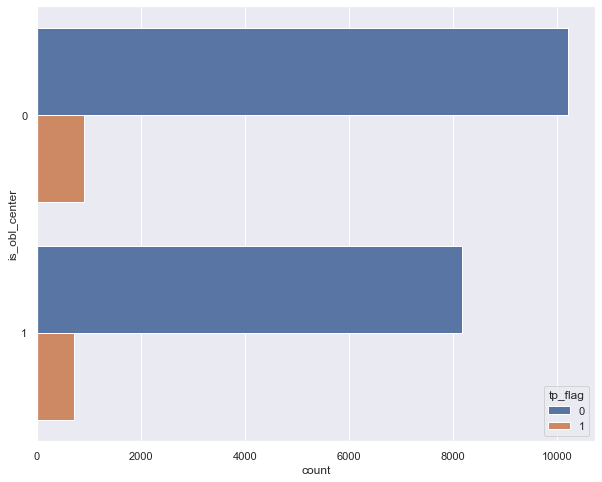

In [15]:
sns.countplot(y='is_obl_center', hue='tp_flag', data=df)

Есть небольшой перевес со стороны людей из обласного центра касательно покупки плана, но небольшой.

Посмотрим, как связаны данные о денежных счетах клиентов и установкой мобильного приложения.

<AxesSubplot:>

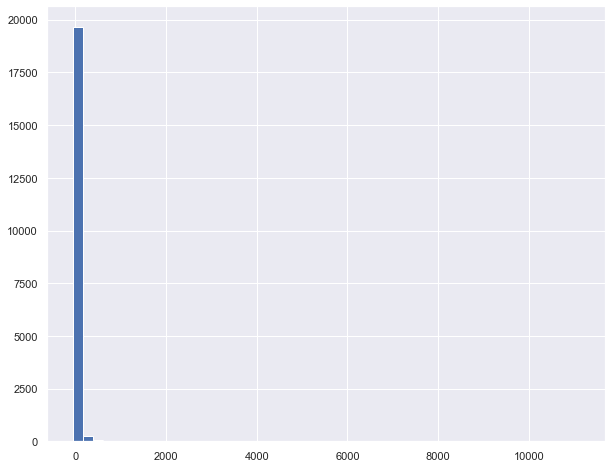

In [16]:
df['balance_sum'].hist(bins=50)

Можно понять, что в данной колонке присутствуют ощутимые выбросы. Используем boxplot.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance_sum'>

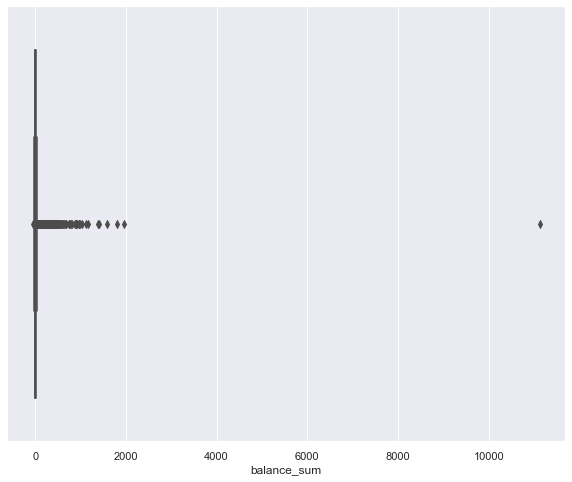

In [17]:
sns.boxplot(df['balance_sum'])

Видим, что есть значительные выбросы. Избавимся от них.

In [18]:
df['balance_sum'] = df[df['balance_sum'] < 1000]['balance_sum']

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance_sum'>

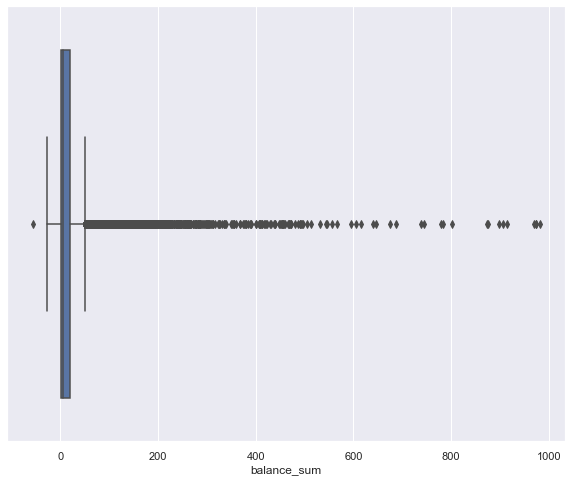

In [19]:
sns.boxplot(df['balance_sum'])

Можно понять, что большинство клиентов в момент сбора данных не имели средств на балансе. У некоторых даже отрицательный баланс.

Проверим, кто устанавливает приложение чаще - клиент с малым количеством средств (до 50) или большим (от 50).

In [20]:
small_sum = df[df['balance_sum'] <= 10]
big_sum = df[df['balance_sum'] > 10]

<AxesSubplot:title={'center':'Small sum'}, xlabel='target', ylabel='count'>

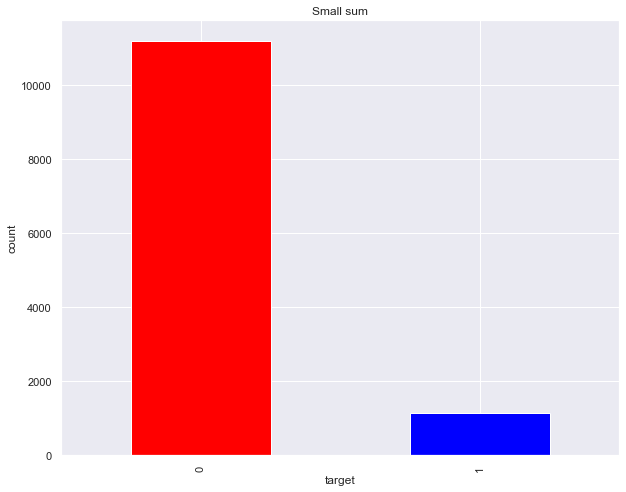

In [21]:
small_sum['target'].value_counts().plot(kind='bar', xlabel='target', ylabel='count', title='Small sum', color=['red', 'blue'])

Для коэфф.кореляции необходим датасет без нанов.

In [41]:
df_ForestImputer = pd.read_csv('../Train_music_ForestImputer.csv')
df_ForestImputer

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,4.810120e+10,0.0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,4.810425e+10,0.0,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,4.811813e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,4.810105e+10,0.0,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,4.830019e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.894477e+09,1.0,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,4.875985e+09,0.0,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,4.811248e+09,0.0,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,4.896164e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


In [80]:
r = pointbiserialr(df_ForestImputer['target'], df_ForestImputer['balance_sum'])
print('Bicerial correlation:', r[0], 'p-value:', r[1])

Bicerial correlation: -0.019004955186317694 p-value: 0.007192849433621968


Так как p-value=0.007 < 0.05, тогда согласно теории мы можем принять альтернативную гипотезу о том, что значимая взаимосвязь есть. Сила взаимосвязи - слабая, направление - обратное.Замечание: к.к. Пирсона выявляет силу и направление линейной взаимосвязи между двумя количественными непрерывными признаками.

<AxesSubplot:title={'center':'Big sum'}, xlabel='target', ylabel='count'>

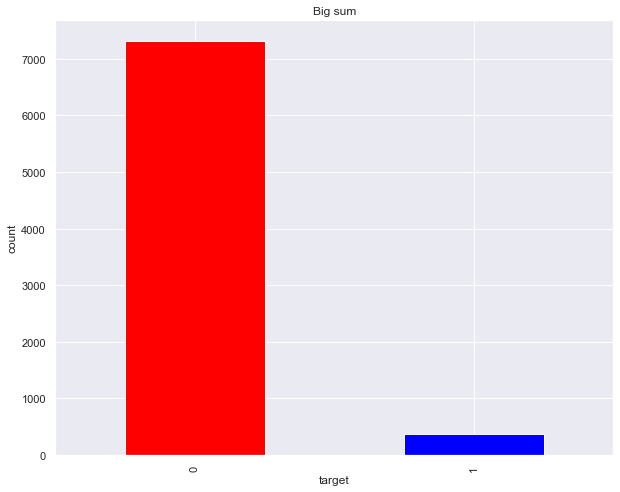

In [22]:
big_sum['target'].value_counts().plot(kind='bar', xlabel='target', ylabel='count', title='Big sum', color=['red', 'blue'])

Как оказалось, люди с малым балансом даже немного чаще устанавливают приложение, чем люди с достаточно большим количеством средств. Возможно, именно устновка приложения так скзалась на этом. Проверим.

<AxesSubplot:>

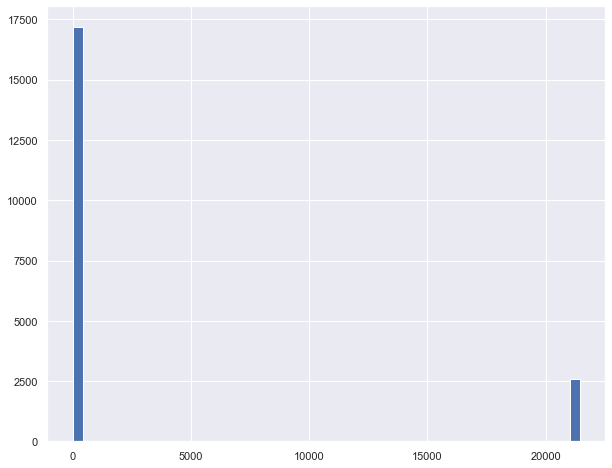

In [23]:
df['paym_last_days'].hist(bins=50)

In [79]:
r = pointbiserialr(df_ForestImputer['target'], df_ForestImputer['paym_last_days'])
print('Bicerial correlation:', r[0], 'p-value:', r[1])

Bicerial correlation: 0.007406992354441382 p-value: 0.29488940738990477


Так как p-value=0.29 > 0.05, тогда согласно теории мы не можем принять альтернативную гипотезу о том, что значимая взаимосвязь есть.

# Нужны графики с lt.

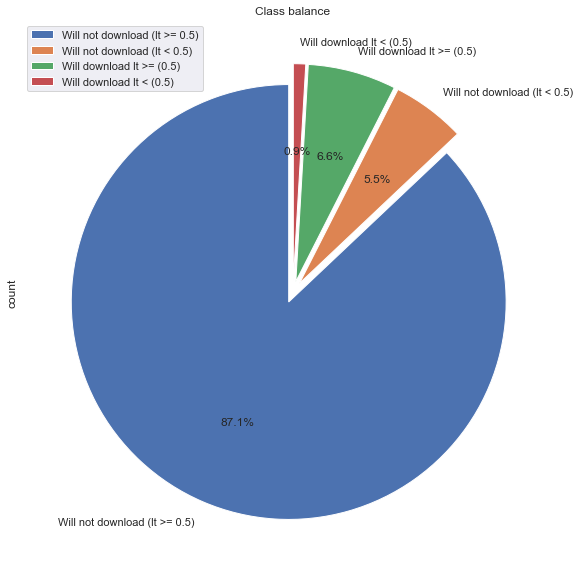

In [5]:
figure, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Class balance")
a = 0.5
pd.DataFrame(
    {'count': [df[df['lt'] >= a]['target'].isin([0]).sum(),
               df[df['lt'] < a]['target'].isin([0]).sum(),
               df[df['lt'] >= a]['target'].isin([1]).sum(),
               df[df['lt'] < a]['target'].isin([1]).sum()
               ]},
    index=['Will not download (lt >= 0.5)',
           'Will not download (lt < 0.5)',
           'Will download lt >= (0.5)',
           'Will download lt < (0.5)']
).plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05, 0.05, 0.05, 0.05), ax=ax)

plt.show()

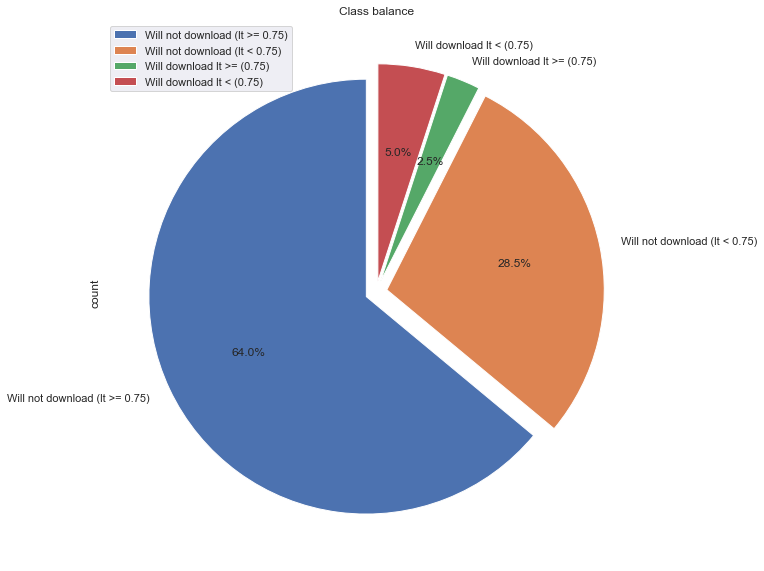

In [6]:
figure, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Class balance")
a = 0.75
pd.DataFrame(
    {'count': [df[df['lt'] >= a]['target'].isin([0]).sum(),
               df[df['lt'] < a]['target'].isin([0]).sum(),
               df[df['lt'] >= a]['target'].isin([1]).sum(),
               df[df['lt'] < a]['target'].isin([1]).sum()
               ]},
    index=['Will not download (lt >= 0.75)',
           'Will not download (lt < 0.75)',
           'Will download lt >= (0.75)',
           'Will download lt < (0.75)']
).plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05, 0.05, 0.05, 0.05), ax=ax)

plt.show()

In [81]:
r = pointbiserialr(df_ForestImputer['target'], df_ForestImputer['lt'])
print('Bicerial correlation:', r[0], 'p-value:', r[1])

Bicerial correlation: -0.18933726249492489 p-value: 8.746708844864537e-161


Так как p-value < 0.05, тогда мы можем принять альтернативную гипотезу. Сила взаимосвязи слабая, направление взаимосвязи - обратное. На данный момент, признак lifetime из всех наилучшим образом коррелирует с таргетом. Хоть, конечно, и сила слабая.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='paym_last_days'>

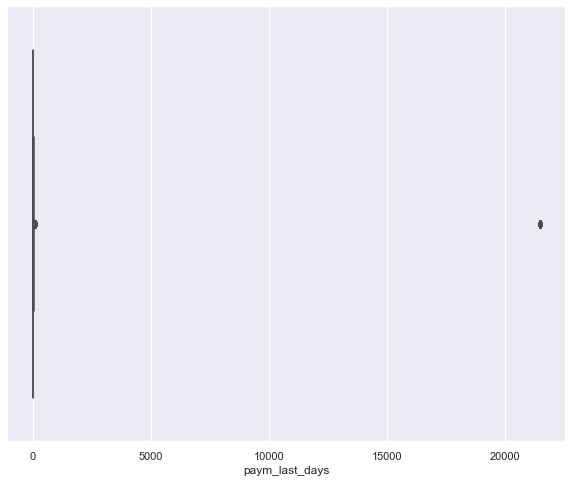

In [24]:
sns.boxplot(df['paym_last_days'])

In [25]:
small_paym = df[df['paym_last_days'] <= 10000]
big_paym = df[df['paym_last_days'] > 10000]

<AxesSubplot:title={'center':'Small paym'}, xlabel='target', ylabel='count'>

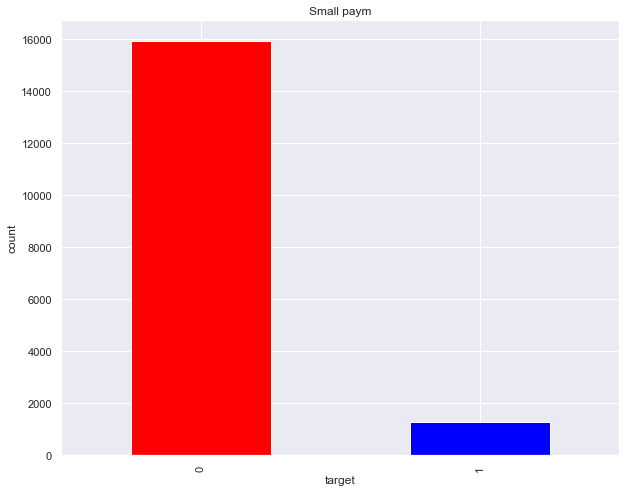

In [26]:
small_paym['target'].value_counts().plot(kind='bar', xlabel='target', ylabel='count', title='Small paym', color=['red', 'blue'])

<AxesSubplot:title={'center':'Big paym'}, xlabel='target', ylabel='count'>

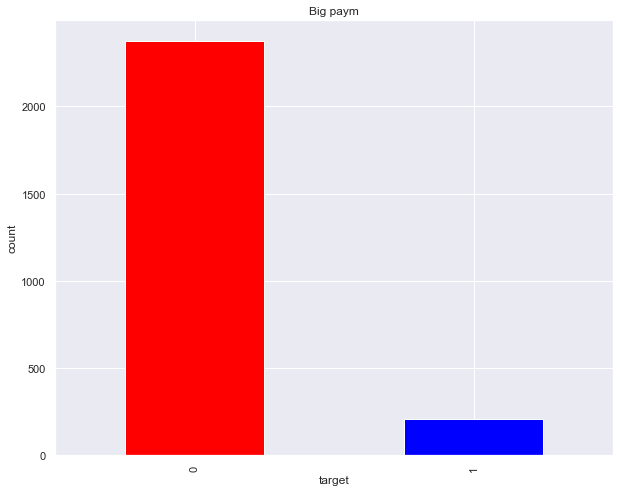

In [27]:
big_paym['target'].value_counts().plot(kind='bar', xlabel='target', ylabel='count', title='Big paym', color=['red', 'blue'])

Определенное количество людей и вправду тратили деньги, по столбчатым диаграммам можно увидеть, что у тех, кто потратил много денег, приложение установлено чаще.

В датасете также присутствует информация про посещения веб-сайтов разной направленности. Посмотрим, кто чаще всего скачивал приложение исходя из данной информации, и существуют ли некоторые связи.

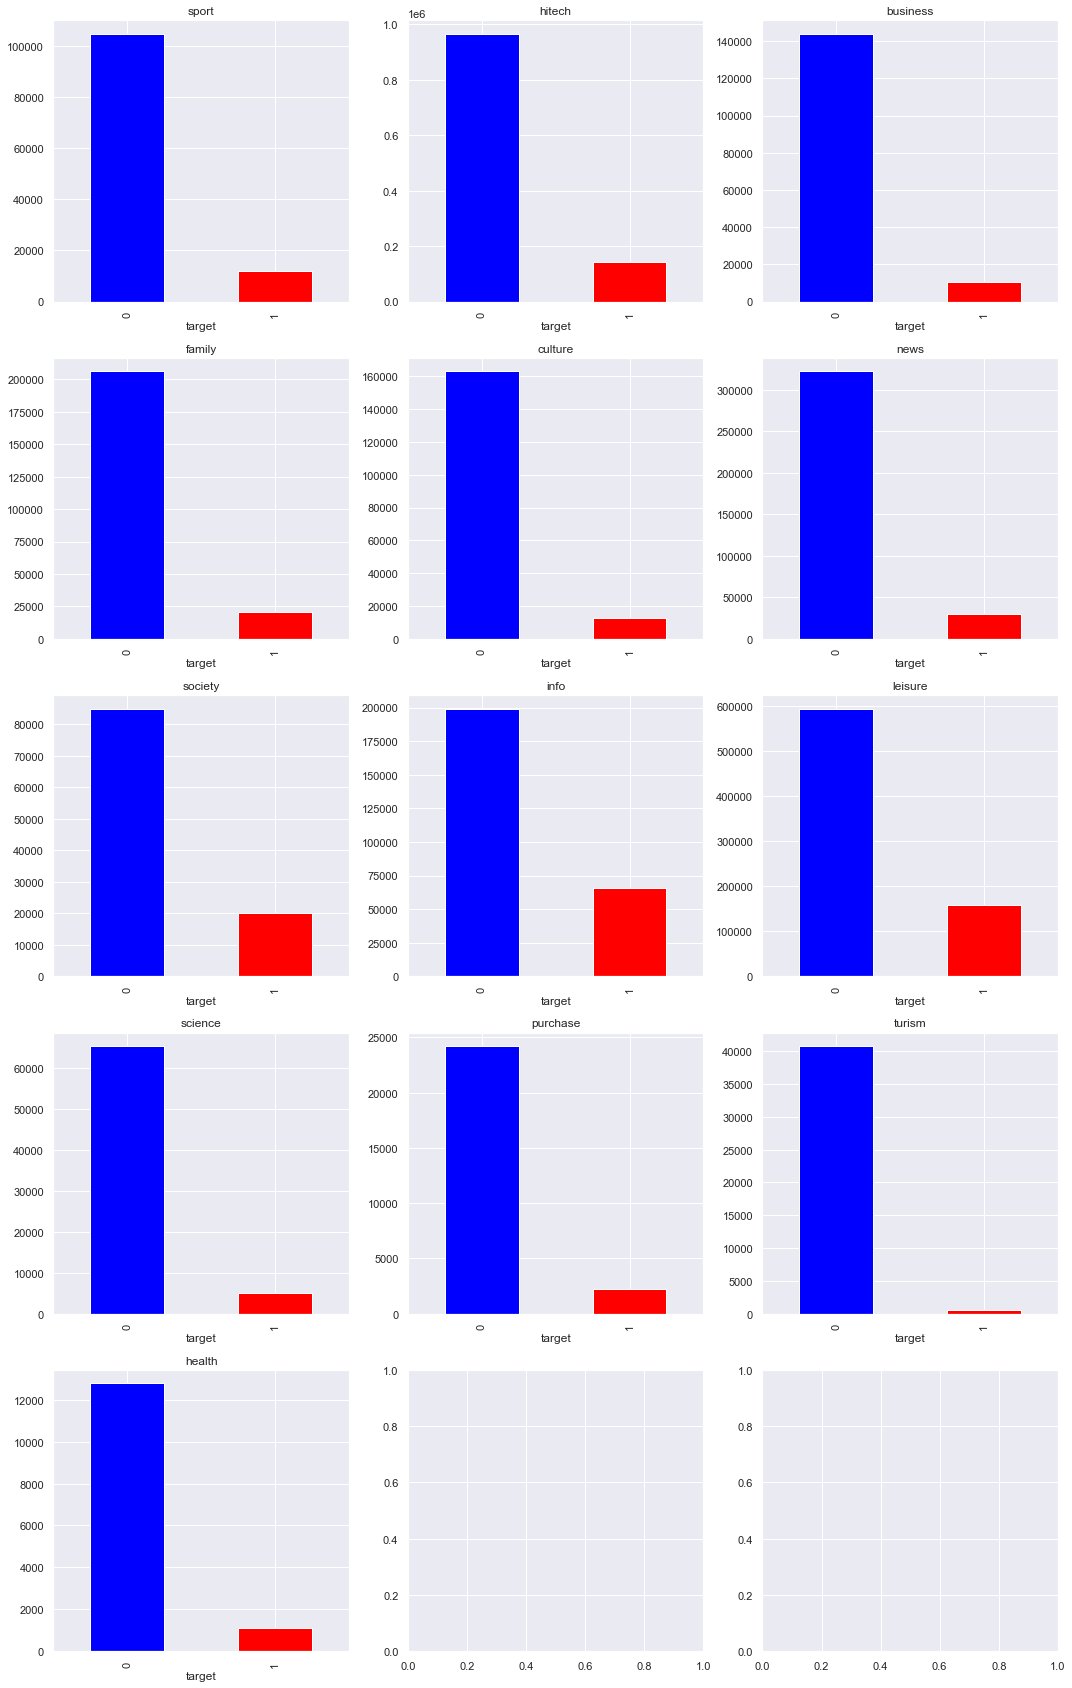

In [29]:
categories = ['count_url_category_%d' % i for i in range(1, 16) if i != 5 and i != 14]
titles = ['sport', 'hitech', 'business', 'family', 'culture', 'news', 'society', 
          'info', 'leisure', 'science', 'purchase', 'turism', 'health']

fig, ax = plt.subplots(5, 3, figsize=(18, 30))

c = 0
for i in range(5):
    for j in range(3):
        if c == 13:
            continue    
        df.groupby('target')[categories[c]].sum().plot(kind='bar', color=['blue', 'red'], title=titles[c], ax=ax[i][j])
        c += 1

Видно, что люди, интересующиеся определенными категориями, охотнее устанавливают приложение. Найдем самые популярные категории в процентном соотношении.

In [30]:
percentage = []

for i in range(13):
    download_part = df.groupby('target')[categories[i]].sum()[1] / df[categories[i]].sum()
    percentage.append([download_part, titles[i]])
    
percentage.sort(reverse=True)
for i in range(13):
    print(percentage[i][1], ': ', percentage[i][0], sep='')

info: 0.24701445156609023
leisure: 0.21092254943652988
society: 0.1910206490798831
hitech: 0.12803354078192625
sport: 0.10190170793607244
family: 0.09084537154998744
news: 0.08444811310050605
purchase: 0.08372726241349318
health: 0.08046886236157054
science: 0.07291401048307125
culture: 0.07106601876484696
business: 0.06909189629428533
turism: 0.012103313887342355


Можем увидеть, что приложение скачали больше всего те, кто заходит на сайты, связанные с **информацией**, **досугом**, **обществом**, **технологиями** и **спортом**.

Посмотрим наличие взаимсвязи и ее характер:

In [78]:
from scipy.stats import pointbiserialr
r = pointbiserialr(df_ForestImputer['count_url_category_9'], df_ForestImputer['target']) 
print('Bicerial correlation between info and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['count_url_category_10'], df_ForestImputer['target'])
print('Bicerial correlation between leisure and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['count_url_category_8'], df_ForestImputer['target'])
print('Bicerial correlation between society and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['count_url_category_2'], df_ForestImputer['target'])
print('Bicerial correlation between hitech and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['count_url_category_1'], df_ForestImputer['target'])
print('Bicerial correlation between  sport and target:', r[0], 'p-value:', r[1])

Bicerial correlation between info and target: 0.029727040444735012 p-value: 2.614231540342166e-05
Bicerial correlation between leisure and target: 0.017448509477499777 p-value: 0.013601254138950379
Bicerial correlation between society and target: 0.024106508406333504 p-value: 0.0006509223140623713
Bicerial correlation between hitech and target: 0.02825388395716627 p-value: 6.435361819389516e-05
Bicerial correlation between  sport and target: 0.02339004167181455 p-value: 0.0009393220056056112


Так как все p-value < 0.05, тогда согласно теории мы можем принять альтернативные гипотезу о том, что значимая взаимосвязь есть. Сила взаимосвязи - слабая, направление - прямое.

Проделаем аналогичые шаги для мобильных приложений, которыми пользуются люди.

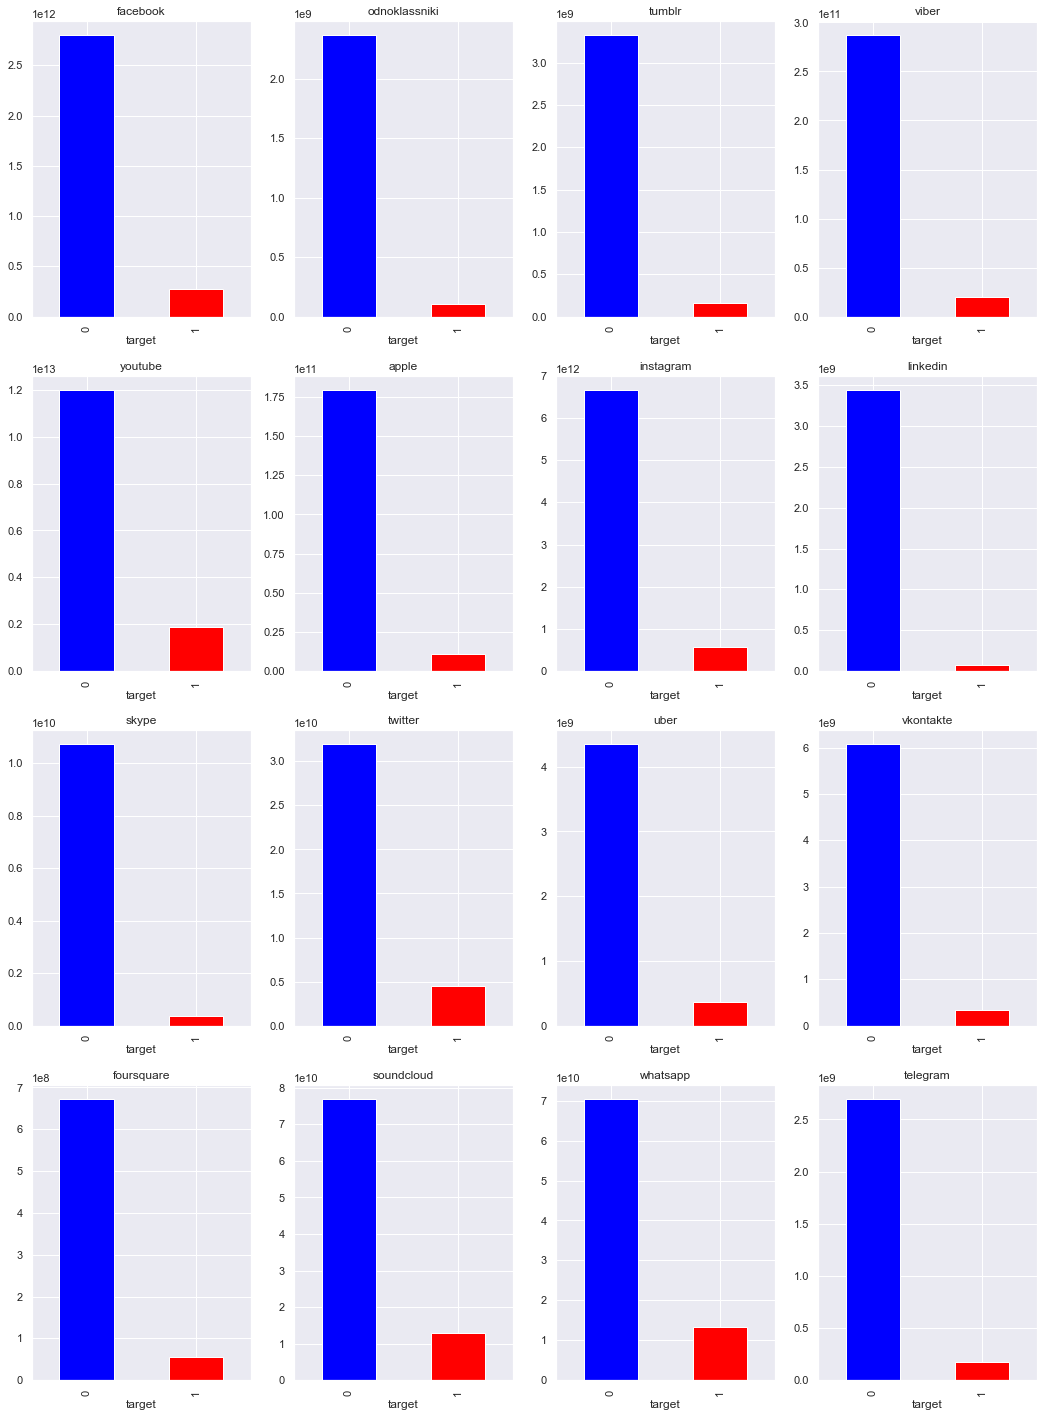

In [31]:
apps = ['vol_app_%d' % i for i in range(1, 17)]
titles = ['facebook', 'odnoklassniki', 'tumblr', 'viber', 'youtube', 'apple', 'instagram', 
          'linkedin', 'skype', 'twitter', 'uber', 'vkontakte', 'foursquare', 'soundcloud', 'whatsapp', 'telegram']

fig, ax = plt.subplots(4, 4, figsize=(18, 25))

c = 0
for i in range(4):
    for j in range(4):    
        df.groupby('target')[apps[c]].sum().plot(kind='bar', color=['blue', 'red'], title=titles[c], ax=ax[i][j])
        c += 1

In [32]:
percentage = []

for i in range(16):
    download_part = df.groupby('target')[apps[i]].sum()[1] / df[apps[i]].sum()
    percentage.append([download_part, titles[i]])
    
percentage.sort(reverse=True)
for i in range(16):
    print(percentage[i][1], ': ', percentage[i][0], sep='')

whatsapp: 0.15879696153562087
soundcloud: 0.14358247617763195
youtube: 0.13626237196257796
twitter: 0.12403501462825756
facebook: 0.08998228156721595
instagram: 0.07881441473661999
uber: 0.07671368473528623
foursquare: 0.0766369163660099
viber: 0.06588768251654999
telegram: 0.06089962203694132
apple: 0.0573617150220943
vkontakte: 0.0524702894515959
tumblr: 0.04583540305828026
odnoklassniki: 0.04353828372196744
skype: 0.03149679968334709
linkedin: 0.020380249193991725


Можем увидеть, что приложение скачали больше всего те, кто пользуется такими приложениями как **whatsapp**, **soundcloud**, **youtube** и **twitter**.

In [73]:
columns=['vol_app_15','vol_app_14','vol_app_5', 'vol_app_10','vol_app_1','vol_app_7', 'target']

In [75]:
from scipy.stats import pointbiserialr
r = pointbiserialr(df_ForestImputer['vol_app_15'], df_ForestImputer['target']) 
print('Bicerial correlation between whatsapp and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['vol_app_14'], df_ForestImputer['target'])
print('Bicerial correlation between soundcloud and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['vol_app_5'], df_ForestImputer['target'])
print('Bicerial correlation between youtube and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['vol_app_10'], df_ForestImputer['target'])
print('Bicerial correlation between twitter and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['vol_app_1'], df_ForestImputer['target'])
print('Bicerial correlation between  facebook and target:', r[0], 'p-value:', r[1])
r = pointbiserialr(df_ForestImputer['vol_app_7'], df_ForestImputer['target'])
print('Bicerial correlation between  instagram and target:', r[0], 'p-value:', r[1])

Bicerial correlation between whatsapp and target: 0.039492905996241806 p-value: 2.310646475297767e-08
Bicerial correlation between soundcloud and target: 0.024825640870382068 p-value: 0.0004460929041087501
Bicerial correlation between youtube and target: 0.0568017084955844 p-value: 9.060192120185221e-16
Bicerial correlation between twitter and target: 0.0076885482295032895 p-value: 0.27691616545150954
Bicerial correlation between  facebook and target: 0.008349210730726801 p-value: 0.23772053752259423
Bicerial correlation between  instagram and target: 0.0028139853410870754 p-value: 0.6906791773629762


То есть принять альтернативую гипотезу мы можем только в случае 3-х первых коэффициентов.
Сила взаимосвязи - слабая, направление - прямое.

У нас также есть информация об участии пользователя в различных акциях от оператора за полгода. Проверим, действительно ли те, кто охотнее учавствует в акциях, устанавливают приложение.

Воспользуемся информацией о количестве отправленных sms, связанных с различной активностью, а также скоростью отклика на активность.

In [33]:
df1 = df.iloc[:, 80:104]
df1['target'] = df['target']

In [34]:
df1['rr_act'] = (df1['rr_act_type_1'] + df1['rr_act_type_2'] + df1['rr_act_type_3'] + df1['rr_act_type_4'] \
                + df1['rr_act_type_5'] + df1['rr_act_type_6'] + df1['rr_act_type_7'] + df1['rr_act_type_8']) / 8

df1['count_act'] = df1['count_act_type_1'] + df1['count_act_type_2'] + df1['count_act_type_3'] + df1['count_act_type_4'] \
                + df1['count_act_type_5'] + df1['count_act_type_6'] + df1['count_act_type_7'] + df1['count_act_type_8']

In [35]:
df1['rr_act'].fillna(0, inplace=True)
df1['count_act'].fillna(0, inplace=True)

<AxesSubplot:xlabel='target'>

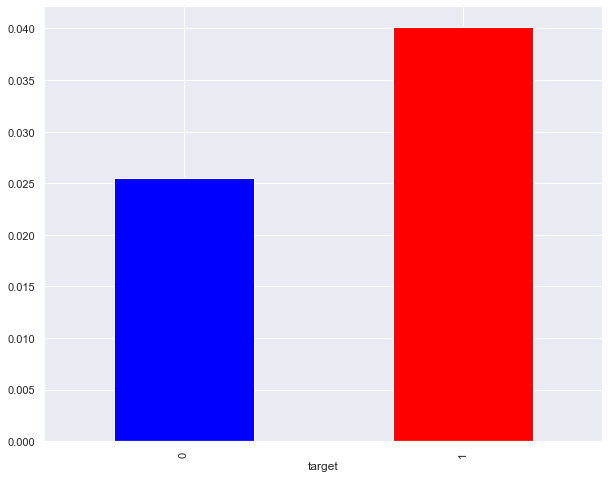

In [36]:
df1.groupby('target')['rr_act'].mean().plot(kind='bar', color=['blue', 'red'])

<AxesSubplot:xlabel='target'>

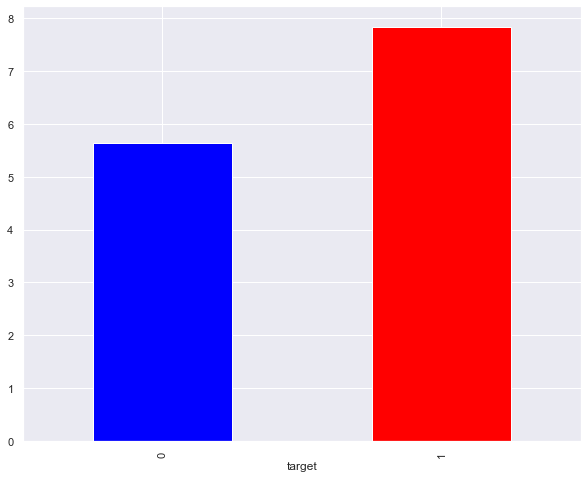

In [37]:
df1.groupby('target')['count_act'].mean().plot(kind='bar', color=['blue', 'red'])

Также у нас имеется информация про количество отправленных sms в различные учреждения. Посмотрим на распределение здесь.

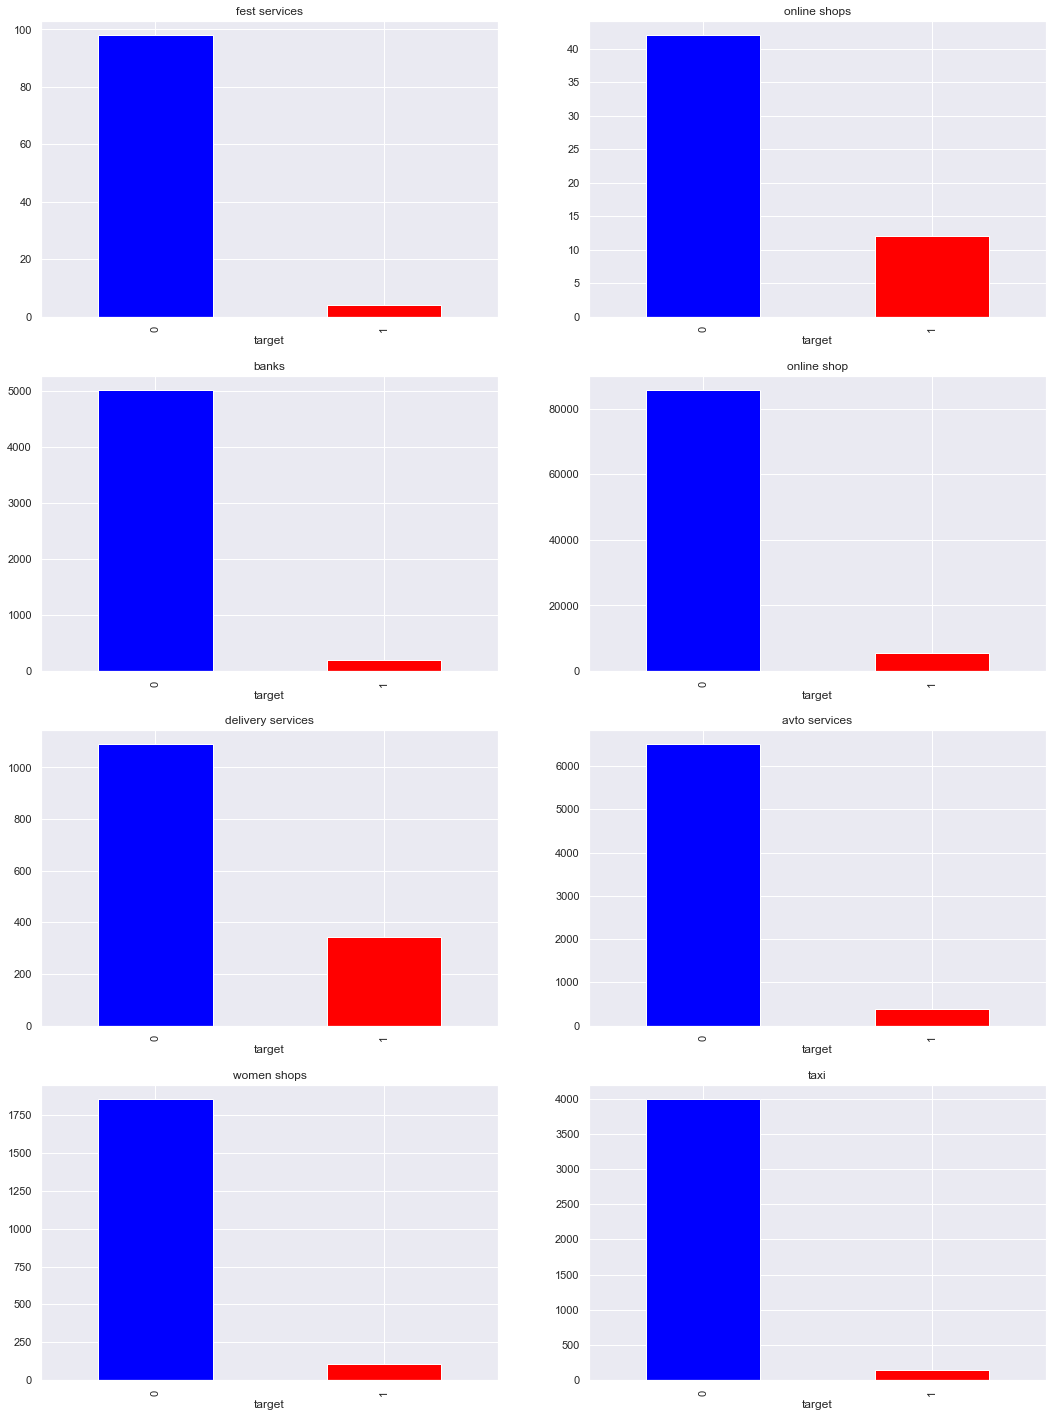

In [38]:
sms = ['count_sms_source_%d' % i for i in range(1, 17) if i not in list(range(5, 12))]
titles = ['fest services', 'online shops', 'banks', 'online shop', 'delivery services', 'avto services', 'women shops', 
          'taxi']

fig, ax = plt.subplots(4, 2, figsize=(18, 25))

c = 0
for i in range(4):
    for j in range(2):
        df.groupby('target')[sms[c]].sum().plot(kind='bar', color=['blue', 'red'], title=titles[c], ax=ax[i][j])
        c += 1

Эта информация известна только за прошлый месяц. Проанализируем те признаки, для которых есть данные за последние 3 месяца.